# **New York City Yellow Taxi Data**
#### Haritha Veerapaneni

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [7]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [8]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.4
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet('./datasets/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data


import os
from pathlib import Path


def get_monthly_trips(directory):
    directory = Path(directory)
    for file in directory.iterdir():
            yield file


def create_sampled_taxi_dataset(directory):
    sampled_dataset = pd.DataFrame()
    for file in get_monthly_trips(directory):
        df = _sample_monthly_trip(file, frac = 0.05, random_seed = 42)
        if not df.empty:
            sampled_dataset = pd.concat([sampled_dataset, df])
    return sampled_dataset 
    

def _sample_monthly_trip(file, frac, random_seed):
    df = pd.read_parquet(file)
    df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    samples = []
    for (date, hour), group in df.groupby(['pickup_date', 'pickup_hour']):
        if not group.empty:
            sample = group.sample(frac=frac, random_state=random_seed)
            samples.append(sample)
            
    if samples:
        sampled_df = pd.concat(samples)
        return sampled_df.drop(['pickup_date', 'pickup_hour'], axis=1)
        
    return pd.DataFrame()

# Analysis: Even at 5% sampling, the number of records will be around 2M. I've left them as is since memory usage is not that much 
# and during cleaning, we'll remove a good number of records. 

df = create_sampled_taxi_dataset('datasets/trip_records')

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [6]:
# Store the df in csv/parquet
df.to_parquet('datasets/trip_records/sampled.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
df = pd.read_parquet('datasets/trip_records/sampled.parquet')

In [10]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3791            2  2023-11-30 23:58:12   2023-12-01 00:06:58              1.0   
1871            2  2023-11-30 23:58:35   2023-12-01 00:06:32              1.0   
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3791              1.31         1.0                  N           163   
1871              1.22         1.0                  N           161   
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3791              162             1        10.00    1.0      0.5        3.00   
1871              229             1         9.30    1.0      0.5        1.43   
1788               50             1        23.30    1.0      0.5        5.66   
3196699            61             0        22.43    0.0      0.5        3.00   
1408              161             1        10.70    1.0      0.5        3.14   

         tolls_amount  improvement_surcharge  total_amount  \
3791              0.0                    1.0         18.00   
1871              0.0                    1.0         15.73   
1788              0.0                    1.0         33.96   
3196699           0.0                    1.0         29.43   
1408              0.0                    1.0         18.84   

         congestion_surcharge  Airport_fee  airport_fee  
3791                      2.5          0.0          NaN  
1871                      2.5          0.0          NaN  
1788                      2.5          0.0          NaN  
3196699                   NaN          NaN          NaN  
1408                      2.5          0.0          NaN

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1996322 entries, 3791 to 3202916
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns

def combine_airport_fee_columns(df):
    df = df.copy()
    if 'airport_fee' in df.columns and 'Airport_fee' not in df.columns:
        return df.rename(columns={'airport_fee': 'Airport_fee'})
    
    if 'airport_fee' not in df.columns:
        return df
        
    df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])
    df = df.drop(columns=['airport_fee'])
    return df

df = combine_airport_fee_columns(df)    

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative
payment_fields = [
    'fare_amount', 
    'extra', 
    'mta_tax', 
    'tip_amount', 
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'congestion_surcharge',
    'Airport_fee'
]

negative_df = df[df[payment_fields].lt(0).any(axis=1)]
display(negative_df)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
25600           2  2023-12-05 15:54:13   2023-12-05 15:54:37              1.0   
49571           2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   
66396           2  2023-12-12 06:57:09   2023-12-12 07:16:37              1.0   
101346          2  2023-12-17 08:10:57   2023-12-17 08:28:46              1.0   
113242          2  2023-12-19 15:33:14   2023-12-19 16:05:27              2.0   
...           ...                  ...                   ...              ...   
1946356         2  2023-06-21 16:01:44   2023-06-21 17:11:47              1.0   
1957783         2  2023-06-23 15:19:43   2023-06-23 15:36:43              1.0   
1967046         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
1989731         2  2023-06-29 17:52:22   2023-06-29 18:11:03              1.0   
1995635         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
25600             0.00         1.0                  N           132   
49571             0.00         2.0                  N           107   
66396             3.30         1.0                  N           164   
101346           11.27         1.0                  N           132   
113242            5.83         1.0                  N           186   
...                ...         ...                ...           ...   
1946356          12.56         2.0                  N           132   
1957783           2.14         1.0                  N           142   
1967046           1.09         2.0                  N            90   
1989731           2.93         1.0                  N           246   
1995635           1.38         2.0                  N           249   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
25600             132             2          0.0    0.0     -0.5         0.0   
49571             137             2          0.0    0.0     -0.5         0.0   
66396             239             2          0.0    0.0     -0.5         0.0   
101346             70             2          0.0    0.0     -0.5         0.0   
113242             87             2          0.0    0.0     -0.5         0.0   
...               ...           ...          ...    ...      ...         ...   
1946356           114             2          0.0    0.0     -0.5         0.0   
1957783           164             2          0.0    0.0     -0.5         0.0   
1967046           170             2          0.0    0.0     -0.5         0.0   
1989731           239             2          0.0    0.0     -0.5         0.0   
1995635           186             2          0.0    0.0     -0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
25600             0.0                   -1.0         -1.50   
49571             0.0                   -1.0         -4.00   
66396             0.0                   -1.0         -4.00   
101346            0.0                   -1.0         -3.25   
113242            0.0                   -1.0         -4.00   
...               ...                    ...           ...   
1946356           0.0                   -1.0         -5.75   
1957783           0.0                   -1.0         -4.00   
1967046           0.0                   -1.0         -4.00   
1989731           0.0                   -1.0         -4.00   
1995635           0.0                   -1.0         -4.00   

         congestion_surcharge  Airport_fee  
25600                     0.0         0.00  
49571                    -2.5         0.00  
66396                    -2.5         0.00  
101346                    0.0        -1.75  
113242                   -2.5         0.00  
...                       ...          ...  
1946356                  -2.5        -1.75  
1957783                  -2.5         0.00  
1967046                  -2.5         0.00  
1989731                  -2

Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Analyse RatecodeID for the negative fare amounts

ratecode_counts = negative_df['RatecodeID'].value_counts()
ratecode_counts.columns = ['RatecodeID', 'count']
display(ratecode_counts)
# Analysis: RatecodeID is following a normal distribution pattern. 

RatecodeID
1.0    50
2.0    25
5.0     3
4.0     1
3.0     1
Name: count, dtype: int64

In [16]:
# Find which columns have negative values
numeric_cols = df.select_dtypes(include='number').columns
columns_with_negatives = numeric_cols[df[numeric_cols].lt(0).any()].tolist()

display(columns_with_negatives)

['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

In [17]:
# fix these negative values
# These negative values are not improper data. These are refunds issued. 
# To continue our analysis, we can either zero them. Instead to preserve the refunds dataset (and do further analysis on which locations/conditions are more 
# susceptible to refunds, We are removing these refunds and storing them in a separate dataframe. 
refunds = negative_df.copy()
df = df[~df.index.isin(negative_df.index)]


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [18]:
# Find the proportion of missing values in each column
missing_counts = df.isna().sum()
total_rows = len(df)
missing_proportions = (missing_counts / total_rows).sort_values(ascending=False)
missing_df = missing_proportions.reset_index()
missing_df.columns = ['Column', 'Missing Proportion']
display(missing_df)

Column  Missing Proportion
0             Airport_fee            0.034235
1    congestion_surcharge            0.034235
2         passenger_count            0.034235
3              RatecodeID            0.034235
4      store_and_fwd_flag            0.034235
5                   extra            0.000000
6            total_amount            0.000000
7   improvement_surcharge            0.000000
8            tolls_amount            0.000000
9              tip_amount            0.000000
10                mta_tax            0.000000
11               VendorID            0.000000
12            fare_amount            0.000000
13   tpep_pickup_datetime            0.000000
14           DOLocationID            0.000000
15           PULocationID            0.000000
16          trip_distance            0.000000
17  tpep_dropoff_datetime            0.000000
18           payment_type            0.000000

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [19]:
# Display the rows with null values
# Impute NaN values in 'passenger_count"

# We're replacing the passenger_count with median passenger count
missing_passengers_count = df[df["passenger_count"].isna()]
median_passengers_count = df[df["passenger_count"] > 0]["passenger_count"].median()
df.fillna({'passenger_count': median_passengers_count}, inplace=True)


zero_passengers_count = df[df["passenger_count"] == 0]
# Observing the data, all the other columns in rows with zero passenger count are normal, so we can chalk zero passenger count to be improper data capture
# That's the reason why we're imputing the value instead of removing those rows. 

df["passenger_count"] = df["passenger_count"].replace(0, median_passengers_count)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [20]:
# Fix missing values in 'RatecodeID'

# For RatecodeId, just like passenger_count we're replacing with mean value
missing_ratecode = df[df["RatecodeID"].isna()]
mean_ratecode = df["RatecodeID"].median()
df.fillna({'RatecodeID': mean_ratecode}, inplace=True)



**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [21]:
# handle null values in congestion_surcharge
# checking whether the missing congestion surcharge values have any correlations. 

print(df[df['congestion_surcharge'].notna()]['congestion_surcharge'].value_counts())

# Check if missing values correspond to specific patterns
missing_surcharge = df[df['congestion_surcharge'].isna()]
not_missing_surcharge = df[df['congestion_surcharge'].notna()]

# Compare locations of rides with missing vs. non-missing values
print("Pickup locations with missing surcharge:")
display(missing_surcharge['PULocationID'].value_counts().head())
print("\nPickup locations with surcharge:")
display(not_missing_surcharge['PULocationID'].value_counts().head())

# Analysis: Found that pick up location 236 is present in both segments i,e, surcharge and no surcharge
# Maybe it was time dependent. 

# Analysis: Further continuing, check if time of day affects surcharge application at location 236
if 'tpep_pickup_datetime' in df.columns:
    location_236 = df[df['PULocationID'] == 236].copy()
    
    location_236['hour'] = pd.to_datetime(location_236['tpep_pickup_datetime']).dt.hour
    print("Hourly breakdown of missing vs present congestion surcharge at location 236:")
    print(location_236.groupby(['hour', location_236['congestion_surcharge'].isna()])['congestion_surcharge'].count())

    location_236['date'] = pd.to_datetime(location_236['tpep_pickup_datetime']).dt.date
    surcharge_by_date = location_236.groupby(['date', location_236['congestion_surcharge'].isna()]).size()
    print("\nDaily breakdown of missing vs present congestion surcharge at location 236:")
    print(surcharge_by_date)

# Analysis: There might be some correlation between different sets of zones i.e, airport will have different surcharge, in additon to 
# pick up and drop off time across various zones causing surcharge. To simplify our process, I'm going ahead with zero-ing 
df.fillna({'congestion_surcharge': 0}, inplace=True)


congestion_surcharge
2.5    1779622
0.0     148277
0.5          1
Name: count, dtype: int64
Pickup locations with missing surcharge:


PULocationID
239    2462
79     2456
236    2344
262    1924
238    1911
Name: count, dtype: int64


Pickup locations with surcharge:


PULocationID
132    102006
237     91510
161     90485
236     81624
162     69170
Name: count, dtype: int64

Hourly breakdown of missing vs present congestion surcharge at location 236:
hour  congestion_surcharge
0     False                    433
      True                       0
1     False                    196
      True                       0
2     False                     93
      True                       0
3     False                     56
      True                       0
4     False                     99
      True                       0
5     False                    205
      True                       0
6     False                   1000
      True                       0
7     False                   3228
      True                       0
8     False                   4497
      True                       0
9     False                   4735
      True                       0
10    False                   5010
      True                       0
11    False                   5536
      True                       0
12    False                   5927
      True           

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [22]:
# Handle any remaining missing values

def handle_missing_airport_fees(df):
    airport_locations = df[df['Airport_fee'].notna()]['PULocationID'].unique()
    rate_code_airports = df[df['RatecodeID'].isin([2, 3])]['PULocationID'].unique()
    all_airport_locations = np.union1d(airport_locations, rate_code_airports)
    
    mask_airport_pickup = df['PULocationID'].isin(all_airport_locations) & df['Airport_fee'].isna()
    df.loc[mask_airport_pickup, 'Airport_fee'] = 1.25
    df['Airport_fee'] = df['Airport_fee'].fillna(0)
    
    return df

df = handle_missing_airport_fees(df)

missing_flag = df[df["store_and_fwd_flag"].isna()]
store_and_fwd_flag_mode = df["store_and_fwd_flag"].mode()[0]
df.fillna({'store_and_fwd_flag': store_and_fwd_flag_mode}, inplace=True)

missing_counts = df.isna().sum()
print(missing_counts[missing_counts > 0])


Series([], dtype: int64)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [23]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Analysis: Trip duration. Anything above 24 hrs or less than zero will be removed. 
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
long_trips = (df['trip_duration'] > 24 * 60).sum()
negative_duration = (df['trip_duration'] < 0).sum()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1996242 entries, 0 to 1996321
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [24]:
# remove passenger_count > 6
df = df[df.passenger_count <= 6]

In [25]:
# Continue with outlier handling

# Entries where trip_distance is 0 and fare_amount is more than 300
df = df[~((df.trip_distance < 0.1) & (df.fare_amount > 300))]

# Remove entries where trip_distance and fare_amount is zero but pickup/dropoff zones are different 
df = df[~((df.trip_distance == 0) & (df.fare_amount == 0) & (df.PULocationID != df.DOLocationID))]

# Remove entries where trip_distance is more than 250 miles.
df = df[~(df.trip_distance > 250)]

# Remove entries where payment_type is 0 
df = df[df.payment_type != 0]

In [26]:
# Do any columns need standardising?

#Analysis 1. passenger count should be integer
df['passenger_count'] = df['passenger_count'].fillna(0).astype(int)


# are these legit numbers of the mis-typed data entries? need further investigation. 
#print(df['mta_tax'].value_counts().sort_index())
print(df['improvement_surcharge'].value_counts().sort_index())
print(df['Airport_fee'].value_counts().sort_index())


# Analysis 2. Total charge validation. 
df['expected_total'] = (
        df['fare_amount'] +
        df['extra'] +
        df['mta_tax'] +
        df['tip_amount'] +
        df['tolls_amount'] +
        df['improvement_surcharge'] +
        df['congestion_surcharge'] +
        df['Airport_fee']).round(2)  
    
df['total_diff'] = (df['expected_total'] - df['total_amount']).round(2)  
df['total_valid'] = df['total_diff'].abs() < 0.1
valid_df = df[df['total_valid'] == True]
print(df['total_diff'].value_counts().sort_index())
# Analysis: the difference between the total amount and the sum of all charges don't vary that much
# They are most standard 1.25USD, 1.75USD, 2.5USD, 3.75USD and 4.25 USD which is a combination of 
# one more more extra surcharges applied which have not been documented.
# One of the ways we can resolve this is to impute the difference in surcharge columns.


# Remove trips where duration is less than zero or greater than 24 hrs. 
df = df[(df['trip_duration'] <= 24 * 60) & (df['trip_duration'] >= 0)]
df = df.drop('expected_total', axis=1)
df = df.drop('total_diff', axis=1)
df = df.drop('total_valid', axis=1)

improvement_surcharge
0.0        700
0.3        864
1.0    1926197
Name: count, dtype: int64
Airport_fee
0.00    1758246
1.00          1
1.25      41949
1.75     127565
Name: count, dtype: int64
total_diff
-2.50       1896
-1.95         47
-0.50          2
 0.00    1446010
 0.30          6
 0.50          1
 1.00          1
 1.25       4390
 1.55          2
 1.75      11472
 2.50     443799
 2.80         50
 3.75       5364
 4.25      14721
Name: count, dtype: int64


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [27]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: numerical
* `extra`: numerical
* `mta_tax`: numerical
* `tip_amount`: numerical
* `tolls_amount`: numerical
* `improvement_surcharge`: numerical
* `total_amount`: numerical
* `congestion_surcharge`: numerical
* `airport_fee`: numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

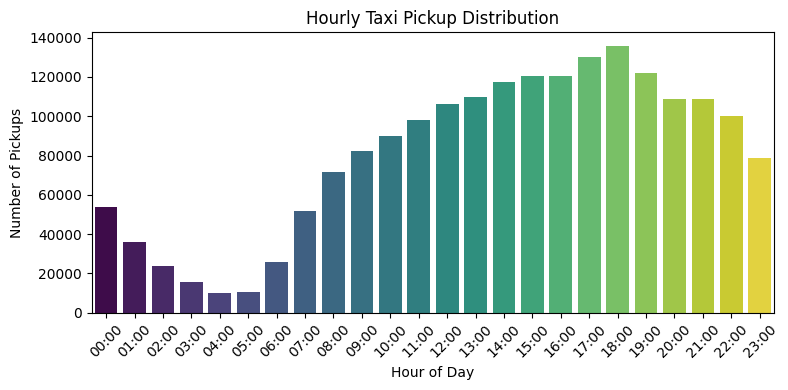

In [28]:
# Find and show the hourly trends in taxi pickups

# Analysis: to simplify, we should add some column names, which are frequently used across multiple questions.  

df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.dayofweek
df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month


def analyze_hourly_trends(df):
    hourly_data = df['pickup_hour'].value_counts().sort_index().reset_index()
    hourly_data.columns = ['hour', 'count']
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x='hour', y='count', hue='hour', data=hourly_data, palette='viridis', legend=False)
    
    plt.title('Hourly Taxi Pickup Distribution')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Pickups')
    plt.xticks(range(24), [f'{h:02d}:00' for h in range(24)], rotation=45)
    plt.tight_layout()
    return plt.gcf()

fig = analyze_hourly_trends(df)
plt.show()

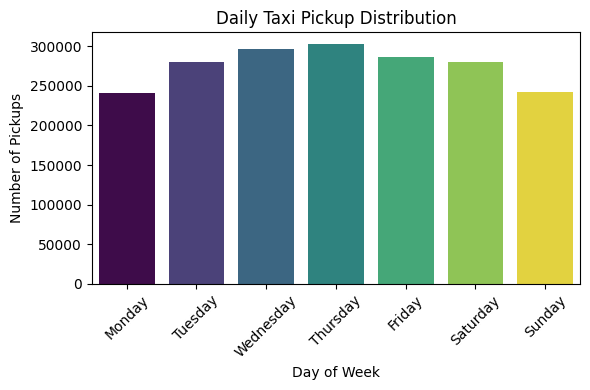

In [29]:
# Find and show the daily trends in taxi pickups (days of the week)

def analyze_daily_trends(df):
    daily_data = df['pickup_day'].value_counts().sort_index().reset_index()
    daily_data.columns = ['day', 'count']
    
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x='day', y='count', hue='day', data=daily_data, palette='viridis', legend=False)
    
    plt.xticks(range(7), day_names, rotation=45)
    plt.title('Daily Taxi Pickup Distribution')
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Pickups')
    plt.tight_layout()
    return df, plt.gcf()

df, fig = analyze_daily_trends(df)
plt.show()

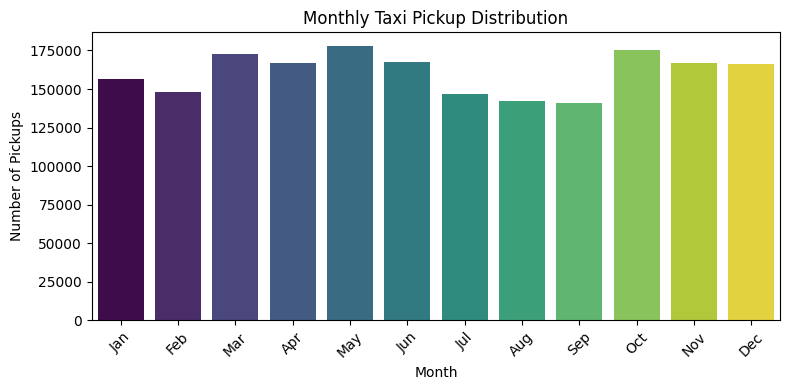

In [30]:
# Show the monthly trends in pickups

def analyze_monthly_trends(df):    
    monthly_data = df['pickup_month'].value_counts().sort_index().reset_index()
    monthly_data.columns = ['month', 'count']
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x='month', y='count', hue='month', data=monthly_data, palette='viridis', legend=False)

    plt.xticks(range(len(monthly_data)), [month_names[m-1] for m in monthly_data['month']], rotation=45)
    plt.title('Monthly Taxi Pickup Distribution')
    plt.xlabel('Month')
    plt.ylabel('Number of Pickups')
    plt.tight_layout()
    return df, plt.gcf()

df, fig = analyze_monthly_trends(df)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [31]:
# Analyse the above parameters

# Analysis: They used to contain negative values as part of refunds issued. We've addressed this 
# in the cleaning section and removed all the refunds into a separate dataframe. 

parameters= ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
negative_df = df[df[payment_fields].lt(0).any(axis=1)]

negative_df.info()
display(negative_df)



<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               0 non-null      int64         
 1   tpep_pickup_datetime   0 non-null      datetime64[us]
 2   tpep_dropoff_datetime  0 non-null      datetime64[us]
 3   passenger_count        0 non-null      int64         
 4   trip_distance          0 non-null      float64       
 5   RatecodeID             0 non-null      float64       
 6   store_and_fwd_flag     0 non-null      object        
 7   PULocationID           0 non-null      int64         
 8   DOLocationID           0 non-null      int64         
 9   payment_type           0 non-null      int64         
 10  fare_amount            0 non-null      float64       
 11  extra                  0 non-null      float64       
 12  mta_tax                0 non-null      float64       
 13  tip_amount            

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, trip_duration, pickup_hour, pickup_day, pickup_month]
Index: []

[0 rows x 23 columns]

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [32]:
# Create a df with non zero entries for the selected parameters.

# Analysis: if the pick up and the drop is in same zone but the trip duration, total amount are non-zero, then we should
# consider this a valid record and should not drop those. 

parameters= ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df = df[~df[parameters].eq(0).any(axis=1)]


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

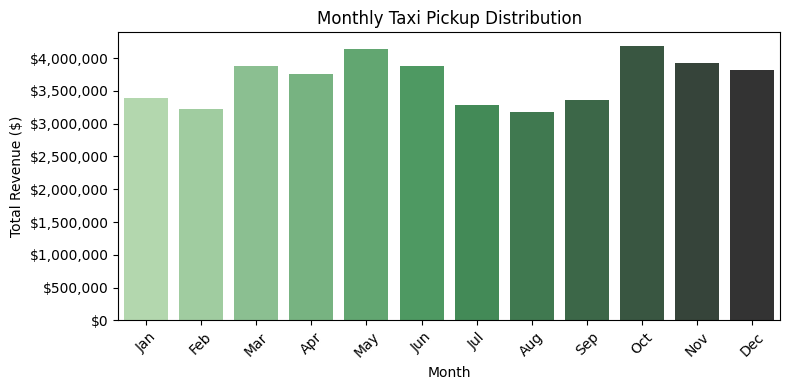

In [33]:
# Group data by month and analyse monthly revenue

def analyze_monthly_revenue(df):
    monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()
    monthly_revenue.columns = ['month', 'revenue']
    
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x='month', y='revenue', hue='month', data=monthly_revenue, palette='Greens_d', legend=False)
    
    plt.xticks(range(len(monthly_revenue)), [month_names[m-1] for m in monthly_revenue['month']], rotation=45)
    plt.ylabel('Total Revenue ($)')
    ax.yaxis.set_major_formatter('${x:,.0f}')
    plt.title('Monthly Taxi Pickup Distribution')
    plt.xlabel('Month')
    plt.tight_layout()
    return df, plt.gcf()

df, fig = analyze_monthly_revenue(df)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

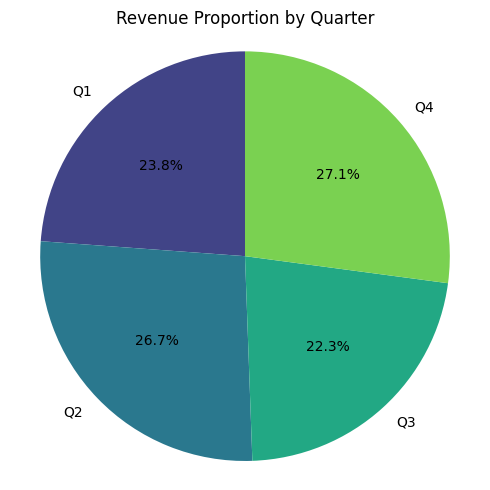

In [34]:
# Calculate proportion of each quarter

def analyze_quarterly_revenue(df):
    df.loc[:, 'quarter'] = df['pickup_month'].apply(lambda x: (x-1)//3 + 1)
    quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()

    total_revenue = quarterly_revenue['total_amount'].sum()
    quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue * 100
    quarterly_revenue['quarter_label'] = quarterly_revenue['quarter'].apply(lambda x: f'Q{x}')
    
    plt.figure(figsize=(5, 5))
    plt.pie(quarterly_revenue['proportion'], labels=quarterly_revenue['quarter_label'], 
            autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', 4))
    plt.axis('equal')  
    plt.title('Revenue Proportion by Quarter')
    plt.tight_layout()
    return plt.gcf()

fig = analyze_quarterly_revenue(df)
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

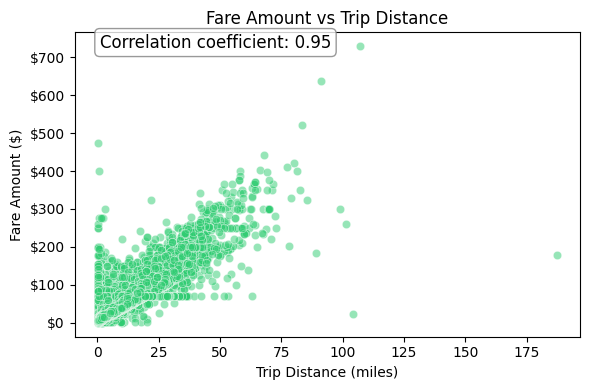

In [35]:
# Show how trip fare is affected by distance

def analyze_fare_vs_distance(df):
    filtered_df = df[df['trip_distance'] > 0]
    
    corr = np.corrcoef(filtered_df['trip_distance'], filtered_df['fare_amount'])[0,1]
    
    plt.figure(figsize=(6, 4))
    ax = sns.scatterplot(x='trip_distance', y='fare_amount', data=filtered_df, alpha=0.5, color='#2ecc71')
    
    plt.title('Fare Amount vs Trip Distance')
    plt.xlabel('Trip Distance (miles)')
    plt.ylabel('Fare Amount ($)')
    
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:.0f}'))
    
    plt.annotate(f'Correlation coefficient: {corr:.2f}', 
                 xy=(0.05, 0.95), xycoords='axes fraction', 
                 fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    return plt.gcf()

fig = analyze_fare_vs_distance(df)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

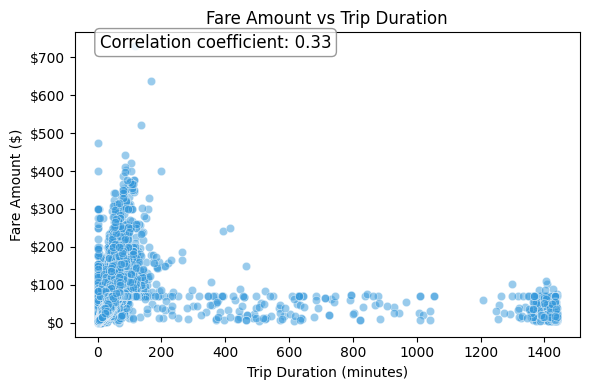

In [62]:
# Show relationship between fare and trip duration
def analyze_fare_vs_duration(df):    
    plt.figure(figsize=(6, 4))

    ax = sns.scatterplot(x='trip_duration', y='fare_amount', data=df, alpha=0.5, color='#3498db')
    corr = np.corrcoef(df['trip_duration'].fillna(0), df['fare_amount'].fillna(0))[0,1]
    
    plt.title('Fare Amount vs Trip Duration')
    plt.xlabel('Trip Duration (minutes)')
    plt.ylabel('Fare Amount ($)')
    
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:.0f}'))
    
    plt.annotate(f'Correlation coefficient: {corr:.2f}', 
                 xy=(0.05, 0.95), xycoords='axes fraction', 
                 fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    return plt.gcf()

fig = analyze_fare_vs_duration(df)
plt.show()


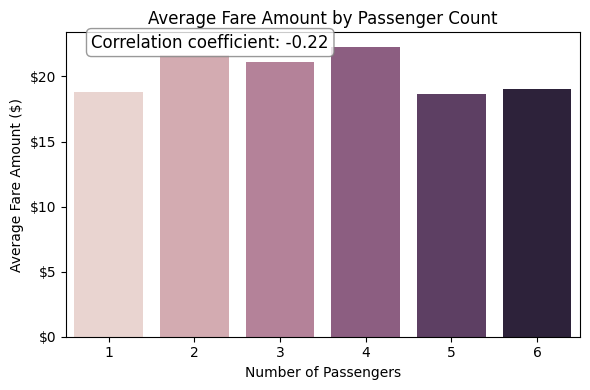

In [63]:
# Show relationship between fare and number of passengers
def analyze_fare_vs_passengers(df):
    fare_by_passengers = df.groupby('passenger_count')['fare_amount'].mean().reset_index()
    
    plt.figure(figsize=(6, 4))
    # Using x for both x and hue, with a categorical palette
    ax = sns.barplot(x='passenger_count', y='fare_amount', hue='passenger_count', 
                    data=fare_by_passengers, legend=False)
    
    plt.title('Average Fare Amount by Passenger Count')
    plt.xlabel('Number of Passengers')
    plt.ylabel('Average Fare Amount ($)')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:.0f}'))
    
    if len(fare_by_passengers) > 1:
        corr = np.corrcoef(fare_by_passengers['passenger_count'], fare_by_passengers['fare_amount'])[0,1]
        plt.annotate(f'Correlation coefficient: {corr:.2f}', 
                     xy=(0.05, 0.95), xycoords='axes fraction', 
                     fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    return df, plt.gcf()


fig = analyze_fare_vs_passengers(df)
plt.show()

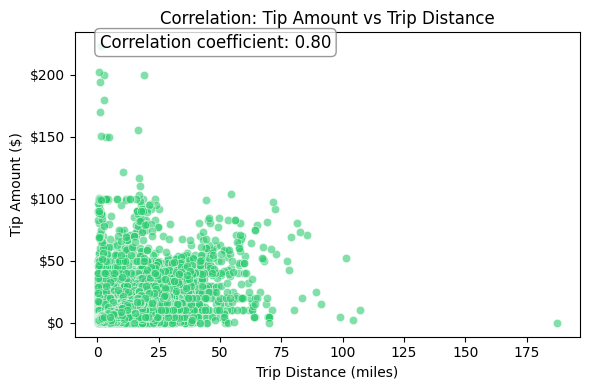

In [64]:
# Show relationship between tip and trip distance
def analyze_tip_vs_distance(df):
    plt.figure(figsize=(6, 4))
    ax = sns.scatterplot(x='trip_distance', y='tip_amount', data=df, alpha=0.6, color='#2ecc71')
    corr = np.corrcoef(df['trip_distance'].fillna(0), df['tip_amount'].fillna(0))[0,1]
    
    plt.title('Correlation: Tip Amount vs Trip Distance')
    plt.xlabel('Trip Distance (miles)')
    plt.ylabel('Tip Amount ($)')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:.0f}'))
    
    plt.annotate(f'Correlation coefficient: {corr:.2f}', 
                 xy=(0.05, 0.95), xycoords='axes fraction', 
                 fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    return df, plt.gcf()

fig = analyze_tip_vs_distance(df)
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [66]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = df['payment_type'].value_counts().sort_index().reset_index()
display(payment_counts)


payment_type    count
0             1  1487194
1             2       25
2             3        9
3             4       16

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [67]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [68]:
import geopandas as gpd

zones = gpd.read_file('datasets/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

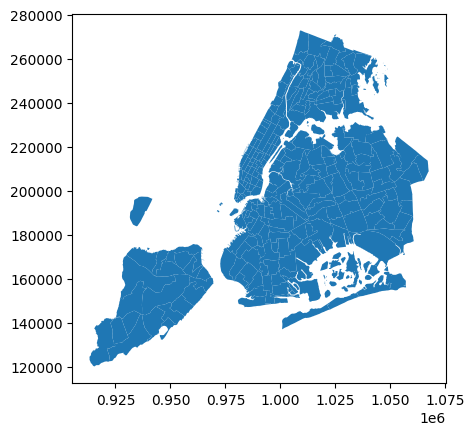

In [69]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [70]:
# Merge zones and trip records using locationID and PULocationID
gdf = zones.merge(
    df,
    left_on='LocationID',
    right_on='PULocationID',
    how='right'
)
gdf.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0     163.0    0.034177    0.000041            Midtown North       163.0   
1     161.0    0.035804    0.000072           Midtown Center       161.0   
2     148.0    0.039131    0.000070          Lower East Side       148.0   
3     161.0    0.035804    0.000072           Midtown Center       161.0   
4     114.0    0.031727    0.000047  Greenwich Village South       114.0   

     borough                                           geometry  VendorID  \
0  Manhattan  POLYGON ((989412.663 219020.943, 990045.841 21...         2   
1  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...         2   
2  Manhattan  POLYGON ((988552.836 201677.665, 988387.669 20...         2   
3  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...         2   
4  Manhattan  POLYGON ((986306.712 203122.786, 986300.242 20...         2   

  tpep_pickup_datetime tpep_dropoff_datetime  ...  tolls_amount  \
0  2023-11-30 23:58:12   2023-12-01 00:06:58  ...           0.0   
1  2023-11-30 23:58:35   2023-12-01 00:06:32  ...           0.0   
2  2023-12-01 00:27:51   2023-12-01 00:50:12  ...           0.0   
3  2023-12-01 00:06:19   2023-12-01 00:16:57  ...           0.0   
4  2023-12-01 00:57:08   2023-12-01 01:05:49  ...           0.0   

   improvement_surcharge  total_amount congestion_surcharge  Airport_fee  \
0                    1.0         18.00                  2.5          0.0   
1                    1.0         15.73                  2.5          0.0   
2                    1.0         33.96                  2.5          0.0   
3                    1.0         18.84                  2.5          0.0   
4                    1.0         18.84                  2.5          0.0   

   trip_duration  pickup_hour  pickup_day  pickup_month  quarter  
0       8.766667           23           3            11        4  
1       7.950000           23           3            11        4  
2      22.350000            0           4            12        4  
3      10.633333            0           4            12        4  
4       8.683333            0           4            12        4  

[5 rows x 31 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [71]:
# Group data by location and calculate the number of trips
pickup_counts = df.groupby('PULocationID').size().reset_index(name='pickup_count')
pickup_counts = pickup_counts.sort_values('pickup_count', ascending=False)
display(pickup_counts)

PULocationID  pickup_count
198           237         73482
133           161         71307
197           236         67079
108           132         67036
134           162         55501
..            ...           ...
172           208             1
37             46             1
188           227             1
48             57             1
50             60             1

[225 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [72]:
# Merge trip counts back to the zones GeoDataFrame

trips_per_zone = gdf.groupby('LocationID').size().reset_index(name='trip_count')
zone_trip_map = zones.merge(trips_per_zone, left_on='LocationID', right_on='LocationID')


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

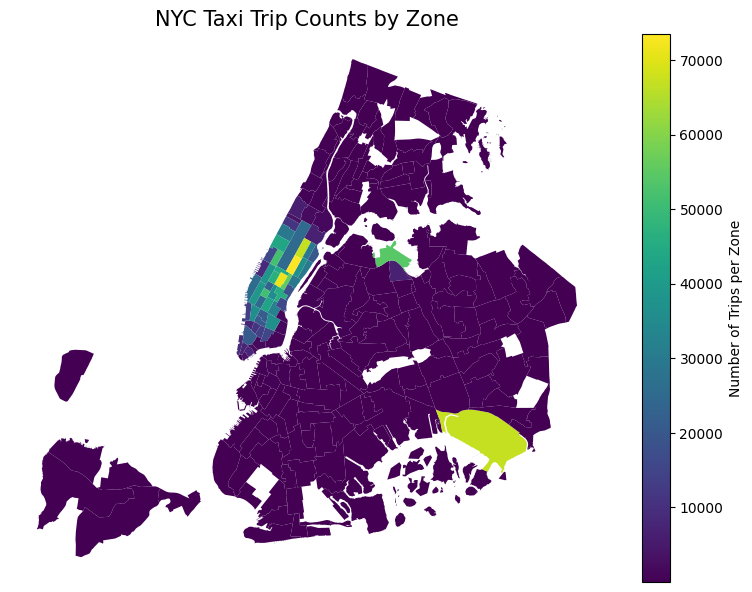

In [77]:
# Define figure and axis
def analyze_trips_per_zone(gdf):
    trips_per_zone = gdf.groupby('LocationID').size().reset_index(name='trip_count')
    zone_trip_map = zones.merge(trips_per_zone, left_on='LocationID', right_on='LocationID')
    fig, ax = plt.subplots(figsize=(8, 6))

    zone_trip_map.plot(
        column='trip_count',
        ax=ax,
        legend=True,
        legend_kwds={'label': "Number of Trips per Zone"}
    )

    plt.title('NYC Taxi Trip Counts by Zone', fontsize=15)
    plt.axis('off')
    plt.tight_layout()
    return fig

fig_trips_zone = analyze_trips_per_zone(gdf)
plt.show()


In [78]:
# can you try displaying the zones DF sorted by the number of trips?

sorted_zones = zone_trip_map.sort_values(by='trip_count', ascending=False)
display(sorted_zones[['zone', 'LocationID', 'trip_count']].head(20))

zone  LocationID  trip_count
198         Upper East Side South         237       73482
133                Midtown Center         161       71307
197         Upper East Side North         236       67079
108                   JFK Airport         132       67036
134                  Midtown East         162       55501
114             LaGuardia Airport         138       54416
117           Lincoln Square East         142       51516
154  Penn Station/Madison Sq West         186       51150
191     Times Sq/Theatre District         230       46749
142                   Murray Hill         170       45429
135                 Midtown North         163       44016
200         Upper West Side South         239       43268
195                      Union Sq         234       42497
58                   East Chelsea          68       39217
39                   Clinton East          48       38371
116               Lenox Hill West         141       36600
68                   East Village          79       36585
209                  West Village         249       35708
136                 Midtown South         164       35057
88                       Gramercy         107       32553

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

## Analysis 

1. Trip distance is the dominant factor determining fare amount, with an extremely strong correlation (r=0.95), while trip duration has surprisingly little impact (r=0.33).
2. Evening rush hour (5-7pm) represents peak taxi demand with nearly double the pickups of morning rush hour, suggesting asymmetric commuting patterns in NYC.
3. Upper East Side and Midtown areas generate over 6 million taxi pickups combined, representing the core of NYC taxi business.
4. October and May are the most lucrative months for taxi revenue, while summer months show a significant decline despite tourism, indicating business travel drives the market.
5. There's a clear midweek peak (Wednesday/Thursday) in taxi usage that drops significantly on weekends, reinforcing the business-centric nature of taxi services.
6. Tip amounts correlate strongly with trip distance (r=0.80), but the highest tips occur on shorter trips, suggesting service quality and passenger demographics influence tipping behavior.
7. The quarterly revenue distribution (Q4>Q2>Q1>Q3) reveals clear seasonal business cycles that taxi companies could leverage for strategic planning.
8. Taxi demand between 4-5am is just 8% of peak evening demand, representing potential opportunities for driver shift optimization.
9. Four-passenger trips generate the highest average fares despite a weak negative correlation between passenger count and fare amount, indicating different usage patterns for group riders.
10. JFK Airport ranks as the 4th busiest pickup location, highlighting the critical importance of airport service to NYC's taxi economy.



#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [95]:
# Find routes which have the slowest speeds at different times of the day
df['duration_hours'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600
df['speed'] = df['trip_distance'] / df['duration_hours'].replace(0, 0.01)
time_bins = {
    'Morning': (5, 10),
    'Midday': (10, 15),
    'Evening': (15, 23),
    'Night': (23, 5)
}

hour = df['tpep_pickup_datetime'].dt.hour
df['time_period'] = 'Night'

for period, (start, end) in time_bins.items():
    if start < end: 
        mask = (hour >= start) & (hour < end)
    else:  
        mask = (hour >= start) | (hour < end)
    df.loc[mask, 'time_period'] = period

valid_trips = df[(df['trip_distance'] > 0.1) & (df['duration_hours'] > 0)]
min_trips = 10

results = []
for period in valid_trips['time_period'].unique():
    period_data = valid_trips[valid_trips['time_period'] == period]
    
    route_speeds = period_data.groupby(['PULocationID', 'DOLocationID']).agg(
        avg_speed=('speed', 'mean'),
        count=('speed', 'count'),
        avg_distance=('trip_distance', 'mean')
    ).reset_index()
    
    slowest = route_speeds[route_speeds['count'] >= min_trips].nsmallest(5, 'avg_speed')
    slowest['time_period'] = period
    results.append(slowest)

slowest_routes = pd.concat(results).reset_index(drop=True)
slowest_routes['route'] = slowest_routes['PULocationID'].astype(str) + ' → ' + slowest_routes['DOLocationID'].astype(str)
display(slowest_routes[['time_period', 'route', 'avg_speed', 'avg_distance', 'count']])


time_period      route  avg_speed  avg_distance  count
0        Night  144 → 148       7.04          0.75    155
1        Night  249 → 114       7.25          0.87    190
2        Night   231 → 45       7.27          0.87     20
3        Night  125 → 211       7.28          0.47     22
4        Night   79 → 148       7.45          0.85    522
5      Morning  246 → 233       5.48          2.06     10
6      Morning  246 → 164       5.90          1.24     46
7      Morning  246 → 230       6.21          1.39     93
8      Morning    52 → 33       6.22          0.61     20
9      Morning  162 → 230       6.30          0.86    203
10      Midday  186 → 100       3.77          0.63    242
11      Midday  186 → 230       4.19          1.09    985
12      Midday  186 → 164       4.35          0.78    308
13      Midday  233 → 230       4.42          1.12    137
14      Midday  162 → 230       4.43          0.93    459
15     Evening  100 → 100       4.78          0.61     93
16     Evening  161 → 230       4.82          0.77    978
17     Evening  186 → 100       4.86          0.65    273
18     Evening  162 → 230       4.87          0.95    796
19     Evening  100 → 230       5.12          0.83    543

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

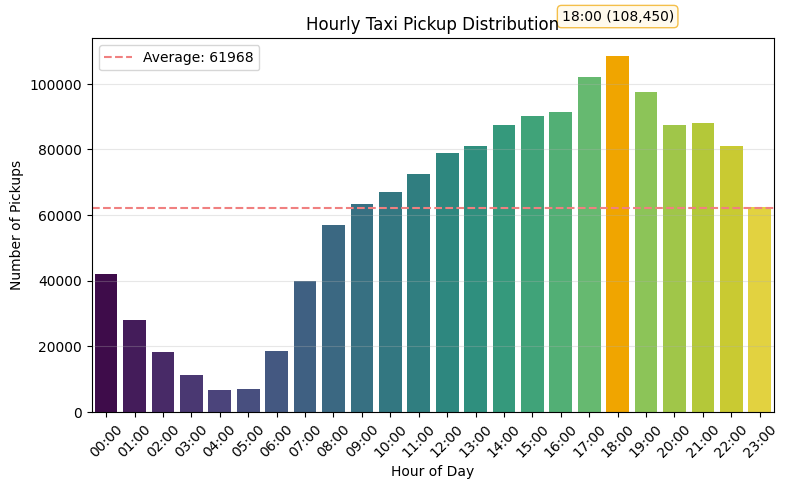

In [81]:
# Visualise the number of trips per hour and find the busiest hour

def analyze_hourly_trends(df):
    hourly_data = df['pickup_hour'].value_counts().sort_index().reset_index()
    hourly_data.columns = ['hour', 'count']
       
    hourly_data['count'] = hourly_data['count'].round().astype(int)
    busiest_hour = hourly_data.loc[hourly_data['count'].idxmax()]
    avg_pickups = hourly_data['count'].mean()
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x='hour', y='count', hue='hour', data=hourly_data, palette='viridis', legend=False)
    
    busiest_idx = int(busiest_hour['hour'])
    ax.patches[busiest_idx].set_facecolor('#f0a500')
    plt.axhline(y=avg_pickups, color='#f08080', linestyle='--', label=f'Average: {avg_pickups:.0f}')
    
    plt.annotate(f'{busiest_hour["hour"]:02d}:00 ({busiest_hour["count"]:,})',
                xy=(busiest_idx, busiest_hour['count']),
                xytext=(busiest_idx, busiest_hour['count'] * 1.1),
                ha='center', bbox=dict(boxstyle='round', fc='#fff9e6', ec='#f0a500', alpha=0.7))
    
    plt.title('Hourly Taxi Pickup Distribution')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Pickups')
    plt.xticks(range(24), [f'{h:02d}:00' for h in range(24)], rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    return plt.gcf()

fig_trips_per_hour = analyze_hourly_trends(df)
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [82]:
# Scale up the number of trips

sample_fraction = 0.05
hourly_counts = df['tpep_pickup_datetime'].dt.hour.value_counts()
top5_hours = hourly_counts.nlargest(5)
scaled_up_top5_hours = (top5_hours * (1/sample_fraction)).round().astype(int)
scaled_up_top5_hours.sort_values(ascending=False)

for hour, trips in scaled_up_top5_hours.items():
    print(f"Hour {hour:02d}:00 - {trips:,} trips")

Hour 18:00 - 2,169,000 trips
Hour 17:00 - 2,041,760 trips
Hour 19:00 - 1,951,540 trips
Hour 16:00 - 1,828,380 trips
Hour 15:00 - 1,802,480 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

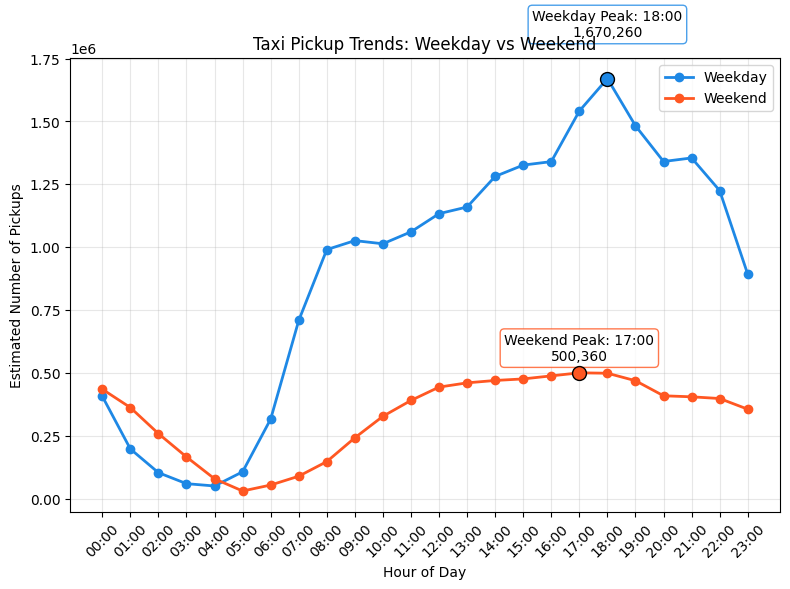

In [84]:
# Compare traffic trends for the week days and weekends

def compare_weekday_weekend_trends(df, sampling_ratio=0.05):
    if 'day_of_week' not in df.columns:
        df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
    
    df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])
    
    hourly_data = df.groupby(['pickup_hour', 'is_weekend']).size().reset_index(name='count')
    
    scaling_factor = 1 / sampling_ratio
    hourly_data['estimated_count'] = (hourly_data['count'] * scaling_factor).round().astype(int)
    
    pivot_data = hourly_data.pivot(index='pickup_hour', columns='is_weekend', values='estimated_count')
    pivot_data.columns = ['Weekday', 'Weekend']
    
    weekday_peak = pivot_data['Weekday'].idxmax()
    weekend_peak = pivot_data['Weekend'].idxmax()
    
    plt.figure(figsize=(8, 6))
    plt.plot(pivot_data.index, pivot_data['Weekday'], marker='o', linewidth=2, color='#1e88e5', label='Weekday')
    plt.plot(pivot_data.index, pivot_data['Weekend'], marker='o', linewidth=2, color='#ff5722', label='Weekend')
    
    plt.scatter([weekday_peak], [pivot_data['Weekday'].loc[weekday_peak]], s=100, color='#1e88e5', 
                 edgecolor='black', zorder=5)
    plt.scatter([weekend_peak], [pivot_data['Weekend'].loc[weekend_peak]], s=100, color='#ff5722', 
                 edgecolor='black', zorder=5)
    
    plt.annotate(f'Weekday Peak: {weekday_peak:02d}:00\n{pivot_data["Weekday"].loc[weekday_peak]:,}',
                xy=(weekday_peak, pivot_data['Weekday'].loc[weekday_peak]),
                xytext=(weekday_peak, pivot_data['Weekday'].loc[weekday_peak] * 1.1),
                ha='center', bbox=dict(boxstyle='round', fc='white', ec='#1e88e5', alpha=0.8))
    
    plt.annotate(f'Weekend Peak: {weekend_peak:02d}:00\n{pivot_data["Weekend"].loc[weekend_peak]:,}',
                xy=(weekend_peak, pivot_data['Weekend'].loc[weekend_peak]),
                xytext=(weekend_peak, pivot_data['Weekend'].loc[weekend_peak] * 1.1),
                ha='center', bbox=dict(boxstyle='round', fc='white', ec='#ff5722', alpha=0.8))
    
    plt.title('Taxi Pickup Trends: Weekday vs Weekend')
    plt.xlabel('Hour of Day')
    plt.ylabel('Estimated Number of Pickups')
    plt.xticks(range(24), [f'{h:02d}:00' for h in range(24)], rotation=45)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    return plt.gcf()

fig_weekday_weekend = compare_weekday_weekend_trends(df)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [85]:
# Find top 10 pickup and dropoff zones

pickup_counts = gdf['zone'].value_counts().head(10).reset_index()
pickup_counts.columns = ['Zone', 'Pickup_Count']
print("Top 10 Pickup Zones:")
display(pickup_counts)

dropoff_zones = zones.merge(
    df,
    left_on='LocationID',
    right_on='DOLocationID',
    how='right'
)
dropoff_counts = dropoff_zones['zone'].value_counts().head(10).reset_index()
dropoff_counts.columns = ['Zone', 'Dropoff_Count']
print("\nTop 10 Dropoff Zones:")
display(dropoff_counts)

Top 10 Pickup Zones:


Zone  Pickup_Count
0         Upper East Side South         73482
1                Midtown Center         71307
2         Upper East Side North         67079
3                   JFK Airport         67036
4                  Midtown East         55501
5             LaGuardia Airport         54416
6           Lincoln Square East         51516
7  Penn Station/Madison Sq West         51150
8     Times Sq/Theatre District         46749
9                   Murray Hill         45429


Top 10 Dropoff Zones:


Zone  Dropoff_Count
0      Upper East Side North          70966
1      Upper East Side South          65705
2             Midtown Center          58365
3                Murray Hill          45374
4      Upper West Side South          44988
5        Lincoln Square East          43636
6               Midtown East          43551
7            Lenox Hill West          41886
8  Times Sq/Theatre District          41363
9               East Chelsea          37974

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [86]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

ratio_df = pd.merge(pickup_counts, dropoff_counts, on='Zone', how='outer')
ratio_df = ratio_df.fillna(0)

ratio_df['Pickup_Dropoff_Ratio'] = ratio_df.apply(
    lambda row: row['Pickup_Count'] / row['Dropoff_Count'] if row['Dropoff_Count'] > 0 else float('inf'),
    axis=1
)
highest_ratios = ratio_df.sort_values('Pickup_Dropoff_Ratio', ascending=False).head(10)
lowest_ratios = ratio_df.sort_values('Pickup_Dropoff_Ratio').head(10)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', 30)

print("Top 10 Zones with Highest Pickup/Dropoff Ratios:")
display(highest_ratios[['Zone', 'Pickup_Count', 'Dropoff_Count', 'Pickup_Dropoff_Ratio']])

print("\nTop 10 Zones with Lowest Pickup/Dropoff Ratios:")
display(lowest_ratios[['Zone', 'Pickup_Count', 'Dropoff_Count', 'Pickup_Dropoff_Ratio']])

Top 10 Zones with Highest Pickup/Dropoff Ratios:


Zone  Pickup_Count  Dropoff_Count  Pickup_Dropoff_Ratio
1                    JFK Airport      67036.00           0.00                   inf
2              LaGuardia Airport      54416.00           0.00                   inf
8   Penn Station/Madison Sq West      51150.00           0.00                   inf
6                   Midtown East      55501.00       43551.00                  1.27
5                 Midtown Center      71307.00       58365.00                  1.22
4            Lincoln Square East      51516.00       43636.00                  1.18
9      Times Sq/Theatre District      46749.00       41363.00                  1.13
11         Upper East Side South      73482.00       65705.00                  1.12
7                    Murray Hill      45429.00       45374.00                  1.00
10         Upper East Side North      67079.00       70966.00                  0.95


Top 10 Zones with Lowest Pickup/Dropoff Ratios:


Zone  Pickup_Count  Dropoff_Count  Pickup_Dropoff_Ratio
0                East Chelsea          0.00       37974.00                  0.00
3             Lenox Hill West          0.00       41886.00                  0.00
12      Upper West Side South          0.00       44988.00                  0.00
10      Upper East Side North      67079.00       70966.00                  0.95
7                 Murray Hill      45429.00       45374.00                  1.00
11      Upper East Side South      73482.00       65705.00                  1.12
9   Times Sq/Theatre District      46749.00       41363.00                  1.13
4         Lincoln Square East      51516.00       43636.00                  1.18
5              Midtown Center      71307.00       58365.00                  1.22
6                Midtown East      55501.00       43551.00                  1.27

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [87]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_trips = gdf[(gdf['pickup_hour'] >= 23) | (gdf['pickup_hour'] <= 5)].copy()
night_pickup_counts = night_trips['zone'].value_counts().head(10).reset_index()
night_pickup_counts.columns = ['Zone', 'Night_Pickup_Count']

location_to_zone = dict(zip(zones['LocationID'], zones['zone']))

night_trips['dropoff_zone'] = night_trips['DOLocationID'].map(location_to_zone)
night_dropoff_counts = night_trips['dropoff_zone'].value_counts().head(10).reset_index()
night_dropoff_counts.columns = ['Zone', 'Night_Dropoff_Count']

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Top 10 Pickup Zones During Night Hours (11 PM to 5 AM):")
display(night_pickup_counts)

print("\nTop 10 Dropoff Zones During Night Hours (11 PM to 5 AM):")
display(night_dropoff_counts)

Top 10 Pickup Zones During Night Hours (11 PM to 5 AM):


Zone  Night_Pickup_Count
0                  East Village               13513
1                  West Village               11051
2                   JFK Airport               10011
3                  Clinton East                8490
4               Lower East Side                8442
5       Greenwich Village South                7686
6     Times Sq/Theatre District                6199
7  Penn Station/Madison Sq West                5640
8                 Midtown South                5033
9             LaGuardia Airport                4939


Top 10 Dropoff Zones During Night Hours (11 PM to 5 AM):


Zone  Night_Dropoff_Count
0           East Village                 7126
1           Clinton East                 5360
2            Murray Hill                 5319
3               Gramercy                 5089
4        Lenox Hill West                 4747
5           East Chelsea                 4729
6         Yorkville West                 4414
7           West Village                 4349
8  Upper West Side South                 3929
9  Upper East Side North                 3864

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [49]:
# Filter for night hours (11 PM to 5 AM)

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['is_nighttime'] = df['pickup_hour'].apply(lambda x: x >= 23 or x < 5)
revenue_by_time = df.groupby('is_nighttime')['total_amount'].sum()
    
total_revenue = revenue_by_time.sum()
revenue_percentage = (revenue_by_time / total_revenue * 100).round(2)


print(f"Total Revenue:      ${total_revenue:,.2f}")
print(f"Daytime Revenue:    ${revenue_by_time[False]:,.2f}  ({revenue_percentage[False]}%)")
print(f"Nighttime Revenue:  ${revenue_by_time[True]:,.2f}  ({revenue_percentage[True]}%)")
print("-"*50)
print(f"Day/Night Ratio:    {(revenue_by_time[False]/revenue_by_time[True]).round(2)}:1")

Total Revenue:      $44,005,118.78
Daytime Revenue:    $39,040,131.00  (88.72%)
Nighttime Revenue:  $4,964,987.78  (11.28%)
--------------------------------------------------
Day/Night Ratio:    7.86:1


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [50]:
# Analyse the fare per mile per passenger for different passenger counts

fare_per_mile_per_passenger = df['fare_amount'] / df['trip_distance'] / df['passenger_count']
fare_stats = fare_per_mile_per_passenger.groupby(df['passenger_count']).mean()

print("Average fare per mile per passenger:")
for passengers, avg_fare in fare_stats.items():
    print(f"{int(passengers)} passenger(s): ${avg_fare:.2f} per mile per passenger")

Average fare per mile per passenger:
1 passenger(s): $9.27 per mile per passenger
2 passenger(s): $4.98 per mile per passenger
3 passenger(s): $3.35 per mile per passenger
4 passenger(s): $4.01 per mile per passenger
5 passenger(s): $1.59 per mile per passenger
6 passenger(s): $1.28 per mile per passenger


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

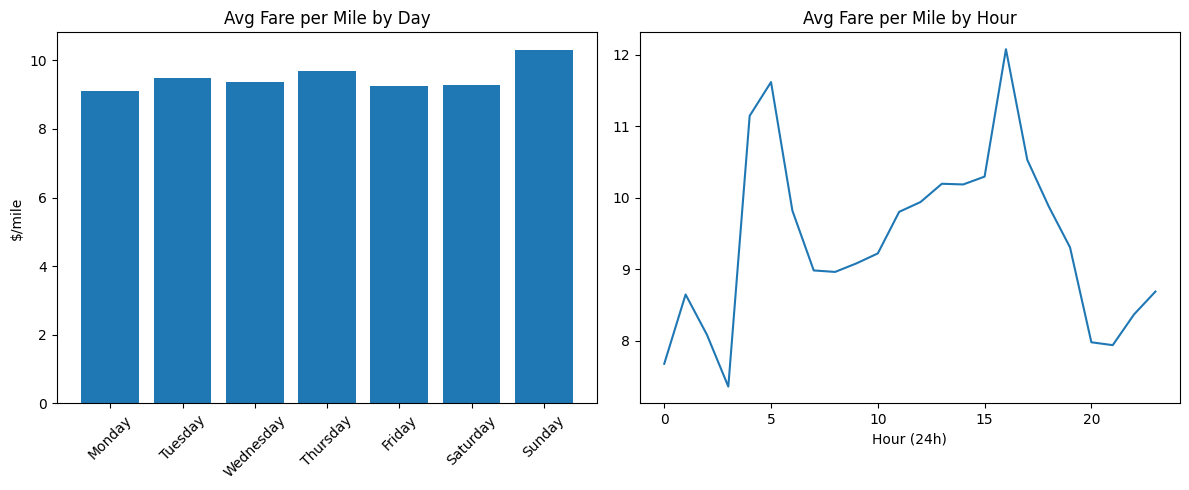

In [92]:
# Compare the average fare per mile for different days and for different times of the day
df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day_name()
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
df['fare_per_mile'] = df['fare_amount'] / df.loc[df['trip_distance'] > 0, 'trip_distance']

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_avg = df.groupby('pickup_day')['fare_per_mile'].mean().reindex(days)
hour_avg = df.groupby('pickup_hour')['fare_per_mile'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=day_avg.index, y=day_avg.values, ax=ax[0], hue=day_avg.index, palette='viridis', legend=False)
ax1.bar(day_avg.index, day_avg.values)
ax1.set_title('Avg Fare per Mile by Day')
ax1.set_ylabel('$/mile')
ax1.tick_params(axis='x', rotation=45)

# Hour plot
sns.lineplot(x=hour_avg.index, y=hour_avg.values, ax=ax[1], color=plt.cm.viridis(0.5), legend=False)
ax2.plot(hour_avg.index, hour_avg.values)
ax2.set_title('Avg Fare per Mile by Hour')
ax2.set_xlabel('Hour (24h)')

plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [52]:
# Compare fare per mile for different vendors
df.loc[:, 'fare_per_mile'] = df['fare_amount'] / df['trip_distance'].replace({0: np.nan})
vendor_hourly_fares = pd.pivot_table(
    df, 
    values='fare_per_mile',
    index='VendorID',
    columns='pickup_hour',
    aggfunc='mean'
).round(2)

styled_table = vendor_hourly_fares.style.set_caption("Average Fare per Mile by Vendor and Hour of Day")\
    .format("${:.2f}")

display(styled_table)

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [53]:
df['distance_tier'] = pd.cut(df['trip_distance'], 
                            bins=[0, 2, 5, float('inf')], 
                            labels=['0-2 miles', '2-5 miles', '5+ miles'])

avg_fare_by_tier = df.groupby(['distance_tier', 'VendorID'], observed=False)['fare_per_mile'].mean().round(2)

fare_comparison = avg_fare_by_tier.unstack()
display(fare_comparison.style.format("${:.2f}").set_caption("Average Fare per Mile by Distance Tier and Vendor"))

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [83]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df = df[df['fare_amount'] > 0].copy()
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

df['pickup_period'] = pd.cut(df['pickup_hour'], [0, 6, 12, 18, 24], 
                            labels=['Night', 'Morning', 'Afternoon', 'Evening'])
df['is_weekend'] = df['tpep_pickup_datetime'].dt.dayofweek >= 5
df['passenger_tier'] = pd.cut(df['passenger_count'], [0, 1, 2, 4, float('inf')], 
                             labels=['1', '2', '3-4', '5+'])
df['is_low_tip'] = df['tip_percentage'] < 10

def analyze_tip_by_factor(df, factor, vendor=True):
    if vendor:
        result = df.groupby([factor, 'VendorID'], observed=False)['tip_percentage'].mean().round(2).unstack()
        display(result.style.format("{:.2f}%").set_caption(f"Average Tip % by {factor} and Vendor"))
    else:
        result = df.groupby(factor, observed=False)['tip_percentage'].mean().round(2)
        display(pd.DataFrame(result).style.format("{:.2f}%").set_caption(f"Average Tip % by {factor}"))
    return result

def analyze_low_tip_by_factor(df, factor):
    result = df.groupby(factor, observed=False)['is_low_tip'].mean() * 100
    display(pd.DataFrame(result).style.format("{:.2f}%").set_caption(f"% of Rides with Low Tips by {factor}"))
    return result

print("Tip Percentage Analysis by Key Factors")
tip_by_distance = analyze_tip_by_factor(df, 'distance_tier')
tip_by_passenger = analyze_tip_by_factor(df, 'passenger_tier')
tip_by_time = analyze_tip_by_factor(df, 'pickup_period')
tip_by_weekend = analyze_tip_by_factor(df, 'is_weekend')

print("\nLow Tip Analysis")
low_tip_by_distance = analyze_low_tip_by_factor(df, 'distance_tier')
low_tip_by_passenger = analyze_low_tip_by_factor(df, 'passenger_tier')
low_tip_by_time = analyze_low_tip_by_factor(df, 'pickup_period')

Tip Percentage Analysis by Key Factors



Low Tip Analysis


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [55]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

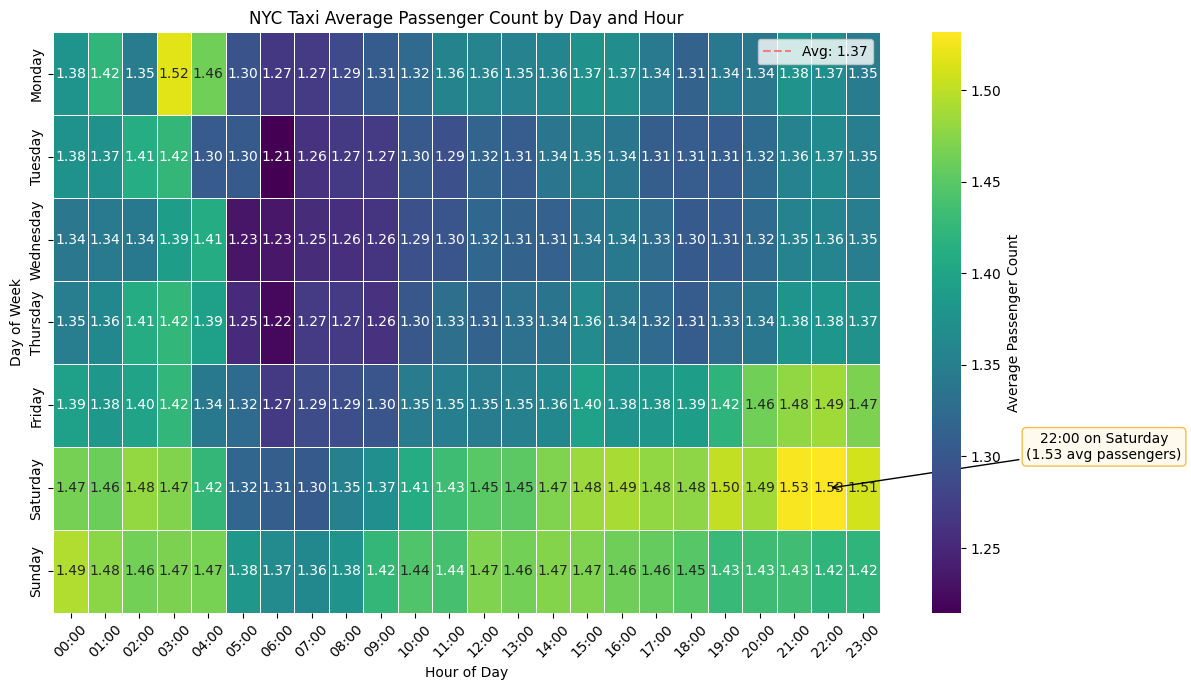

In [56]:
# See how passenger count varies across hours and days

def analyze_passenger_distribution(df):
    df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
    df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day_name()
    
    passenger_data = df.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().unstack()
    
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    passenger_data = passenger_data.reindex(days)
    
    busiest_idx = np.unravel_index(passenger_data.values.argmax(), passenger_data.shape)
    busiest_day, busiest_hour = days[busiest_idx[0]], passenger_data.columns[busiest_idx[1]]
    max_count = passenger_data.values[busiest_idx]
    avg_passengers = passenger_data.values.mean()
    
    plt.figure(figsize=(12, 7))
    ax = sns.heatmap(
        passenger_data, 
        annot=True, 
        fmt='.2f',
        cmap='viridis', 
        linewidths=0.5,
        cbar_kws={'label': 'Average Passenger Count'}
    )
    
    avg_line = plt.Line2D([0, 1], [0, 0], color='#f08080', linestyle='--', 
                         label=f'Avg: {avg_passengers:.2f}')
    plt.legend(handles=[avg_line], loc='upper right')
    
    highlight = plt.Rectangle((busiest_idx[1], busiest_idx[0]), 1, 1, 
                             fill=True, color='#f0a500', alpha=0.3, zorder=0)
    ax.add_patch(highlight)
    
    plt.annotate(
        f'{busiest_hour:02d}:00 on {busiest_day}\n({max_count:.2f} avg passengers)',
        xy=(busiest_idx[1] + 0.5, busiest_idx[0] + 0.5),
        xytext=(busiest_idx[1] + 8.5, busiest_idx[0]),
        ha='center', va='center',
        bbox=dict(boxstyle='round', fc='#fff9e6', ec='#f0a500', alpha=0.7),
        arrowprops=dict(arrowstyle='->')
    )
    
    plt.title('NYC Taxi Average Passenger Count by Day and Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of Week')
    plt.xticks(np.arange(0.5, 24.5), [f'{h:02d}:00' for h in range(24)], rotation=45)
    
    plt.tight_layout()
    return plt

fig_passenger_distribution = analyze_passenger_distribution(df)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [57]:
# How does passenger count vary across zones

def analyze_passenger_variation_by_zone(gdf):
    zone_passengers = gdf.groupby(['zone', 'borough'])['passenger_count'].mean().reset_index()
    zone_passengers = zone_passengers.sort_values('passenger_count', ascending=False)
    zone_passengers['passenger_count'] = zone_passengers['passenger_count'].round(2)
    
    variation_stats = {
        'max_avg': zone_passengers['passenger_count'].max(),
        'min_avg': zone_passengers['passenger_count'].min(),
        'range': zone_passengers['passenger_count'].max() - zone_passengers['passenger_count'].min(),
        'global_avg': gdf['passenger_count'].mean().round(2)
    }
    return zone_passengers, variation_stats

zone_passenger_stats, variation_stats = analyze_passenger_variation_by_zone(gdf)

print("\nZones with highest average passenger counts:")
print(zone_passenger_stats.head(10)[['zone','passenger_count']].to_string(index=False))

print("\nZones with lowest average passenger counts:")
print(zone_passenger_stats.tail(10)[['zone', 'passenger_count']].to_string(index=False))

print(f"\nSummary:")
print(f"- Average passenger counts range from {variation_stats['min_avg']} to {variation_stats['max_avg']} across zones")
print(f"- Range of {variation_stats['range']:.2f} passengers between highest and lowest zones")
print(f"- Overall average: {variation_stats['global_avg']} passengers per trip")


Zones with highest average passenger counts:
                   zone  passenger_count
    Ocean Parkway South             6.00
 West Farms/Bronx River             5.00
Arrochar/Fort Wadsworth             3.00
     Claremont/Bathgate             3.00
          Fresh Meadows             2.67
        Oakland Gardens             2.20
               Flushing             2.11
    Green-Wood Cemetery             2.00
        Queensboro Hill             2.00
          Willets Point             2.00

Zones with lowest average passenger counts:
                             zone  passenger_count
                     Saint Albans              1.0
     Schuylerville/Edgewater Park              1.0
               Soundview/Bruckner              1.0
            Soundview/Castle Hill              1.0
        Springfield Gardens North              1.0
University Heights/Morris Heights              1.0
               Van Cortlandt Park              1.0
         Williamsbridge/Olinville              1.0

In [58]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [79]:
# How often is each surcharge applied?

surcharge_cols = ['extra', 'mta_tax', 'congestion_surcharge', 'improvement_surcharge', 'Airport_fee']

surcharge_summary = pd.DataFrame({
    'Surcharge': surcharge_cols,
    'Applied_Count': [(gdf[col] > 0).sum() for col in surcharge_cols],
    'Percentage': [(gdf[col] > 0).mean() * 100 for col in surcharge_cols]
}).sort_values('Applied_Count', ascending=False)

zone_surcharges = {}
for surcharge in surcharge_cols:
    top_zones = gdf.groupby('zone')[surcharge].mean().sort_values(ascending=False).head(5)
    zone_surcharges[surcharge] = top_zones

time_surcharges = {}
for surcharge in surcharge_cols:
    by_hour = gdf.groupby('pickup_hour')[surcharge].mean().reset_index()
    time_surcharges[surcharge] = by_hour


print("1. Surcharge Frequencies")
display(surcharge_summary)

print("\n2. Top 5 Zones with Highest Average Extra Charges:")
display(pd.DataFrame(zone_surcharges['extra']).rename(columns={'extra': 'Average Extra ($)'}).style.format({'Average Extra ($)': '${:.2f}'}))

print("\n3. Top 5 Zones with Highest Congestion Surcharges:")
display(pd.DataFrame(zone_surcharges['congestion_surcharge']).rename(columns={'congestion_surcharge': 'Average Surcharge ($)'}).style.format({'Average Surcharge ($)': '${:.2f}'}))

print("\n4. Top 5 Zones with Highest Airport Fees:")
display(pd.DataFrame(zone_surcharges['Airport_fee']).rename(columns={'Airport_fee': 'Average Fee ($)'}).style.format({'Average Fee ($)': '${:.2f}'}))


def get_time_period(hour):
    if 5 <= hour < 12: return 'Morning (5AM-12PM)'
    elif 12 <= hour < 17: return 'Afternoon (12PM-5PM)'
    elif 17 <= hour < 23: return 'Evening (5PM-11PM)'
    else: return 'Night (11PM-5AM)'

gdf['time_period'] = gdf['pickup_hour'].apply(get_time_period)
period_surcharges = gdf.groupby('time_period')[surcharge_cols].mean()

print("\n6. Average Surcharges by Time Period:")
display(period_surcharges)

1. Surcharge Frequencies


Surcharge  Applied_Count  Percentage
3  improvement_surcharge        1487629      100.00
1                mta_tax        1479196       99.43
2   congestion_surcharge        1412405       94.94
0                  extra         944649       63.50
4            Airport_fee         122326        8.22


2. Top 5 Zones with Highest Average Extra Charges:



3. Top 5 Zones with Highest Congestion Surcharges:



4. Top 5 Zones with Highest Airport Fees:



6. Average Surcharges by Time Period:


extra  mta_tax  congestion_surcharge  improvement_surcharge  Airport_fee
time_period                                                                                   
Afternoon (12PM-5PM)   1.37     0.50                  2.38                   1.00         0.14
Evening (5PM-11PM)     2.30     0.50                  2.38                   1.00         0.14
Morning (5AM-12PM)     1.02     0.50                  2.38                   1.00         0.12
Night (11PM-5AM)       1.70     0.50                  2.35                   1.00         0.14

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Analysis of NYC taxi data reveals critical operational patterns that can drive strategy improvements.

Passenger counts vary significantly across zones, from 6.0 in Ocean Parkway South to 1.0 in many residential areas, with a citywide average of 1.37 passengers per trip. This geographic variation presents clear opportunities for vehicle type optimization.

The revenue split shows daytime operations generating 88.72% ($39M) of total revenue while nighttime operations account for just 11.28% ($4.9M), creating a 7.86:1 day-night ratio. This indicates the need for strategic resource allocation that balances coverage needs with revenue potential.

Demand hotspots are clearly defined, with East Village (13,513 pickups, 7,126 dropoffs) dominating nighttime activity, followed by West Village and JFK Airport. The Upper East Side consistently shows the highest overall trip volumes, with Midtown Center and JFK Airport also maintaining high demand.

Operational efficiency varies dramatically by time period, with night routes (144→148, 249→114) achieving the fastest speeds (7.04-7.25 mph). Morning routes operate at moderate speeds (5.48-6.30 mph) over longer distances, while midday operations slow considerably (3.77-4.43 mph) due to congestion, particularly in zone 186→100. Evening operations show partial recovery to 4.78-5.12 mph.

These patterns offer a foundation for targeted operational improvements across routing, vehicle positioning, and pricing strategies.

1. Pre-position vehicles near nighttime hotspots (East Village, West Village) before demand spikes.
2. Create a surge handling team of 15-20 vehicles that can rapidly deploy to emerging hotspots
3. Develop alternative route suggestions for consistently congested midday routes (186→100, 186→230)
4. Create specialized airport approach protocols for JFK and LaGuardia routes
5. Assign highest-rated drivers to the most congested midday routes (zones 186→100, 186→230)
6. Implement driver incentive bonuses for maintaining optimal speeds during peak congestion hours.

    

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Time Based Positioning Strategy
  - Morning (6AM-10AM): Position 30% of fleet in Upper East/West Side residential areas
  - Midday (10AM-4PM): Concentrate 40% in Midtown zones (133, 134, 142)
  - Evening (4PM-8PM): Focus 25% around Times Square, Penn Station, and East Chelsea
  - Night (8PM-6AM): Distribute 15% across East Village, West Village, and airport corridors
2. Deploy larger vehicles (4+) capacity to high passenger count zones like Ocean Parkway South and West Farms/Bronx River and allot smaller vehicles to residential areas. Ensure Airport gets a mix of both types of vehicles.
3. Use day-specific positioning plans with increased weekend coverage in entertainment districts (Friday - Saturday nights)
4. Deploy additional vehicles to shopping districts during December holiday season
5. Implement holiday-specific positioning strategies for major events and tourist seasons
    

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Implement peak-hour premiums (7-9AM, 5-7PM) of 10-15%
2. Offer strategic discounts during identified low-demand periods (10AM-12PM Tuesday-Thursday)
3. Create late-night premiums for high-demand areas (East Village, West Village)
4. Add a slight premium for consistently high-demand pickup locations
5. Set base rates in high-volume zones 5% below major rideshare competitors to maintain competitiveness
6. Implement dynamic airport pricing adjusted based on flight arrival volume data
7. Launch multi-passenger pricing with 5% discount for 3+ passengers, 10% for 5+ passengers

